# Extract data into df

In [1]:
# Input websites
base_url = 'https://index.minfin.com.ua/ua/russian-invading/casualties/'

In [2]:
# Create a list of months that serves as a url input for websites
import datetime
current_month = datetime.datetime.now().month # a number of passed months

month_list = []
for i in range(2,current_month + 1): # add the current month
        t = datetime.datetime(2022, i, 1, 0, 0)
        t = t.strftime('%Y-%m')
        month_list.append(t)


In [3]:
month_list

['2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07',
 '2022-08',
 '2022-09',
 '2022-10',
 '2022-11']

In [4]:
import requests
import bs4
result_set = []
# Create the ResultSet
for month in reversed(month_list):
    print(month)
    res = requests.get(base_url + month)
    soup = bs4.BeautifulSoup(res.text, 'html.parser');
    data = soup.find_all("div",{"class":"casualties"})
    result_set.extend(data[1:])

2022-11
2022-10
2022-09
2022-08
2022-07
2022-06
2022-05
2022-04
2022-03
2022-02


In [5]:
#  Iterate through ResultSet (or invasion dates) and add data to the empty df one by oe by assigning values to keys in a dictionary
import pandas as pd
df = pd.DataFrame()
for i in reversed(range(len(result_set))): 
    children = result_set[i].find_all("li")
    d = {}
    for child in children:
        list = child.getText().split()
        indx = list.index('—')
        name = []
        for j in range(indx):
            name.append(list[j])
        name = " ".join(list[:indx])
        res = [int(ele) for ele in list if ele.isdigit()]
        d[name] = res[0]
    df = df.append(d, ignore_index = True)
        

/var/folders/lh/cqpxzpsx44zdjqktqsfb722m0000gn/T/ipykernel_72719/3530480628.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index = True)
/var/folders/lh/cqpxzpsx44zdjqktqsfb722m0000gn/T/ipykernel_72719/3530480628.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index = True)
/var/folders/lh/cqpxzpsx44zdjqktqsfb722m0000gn/T/ipykernel_72719/3530480628.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index = True)
/var/folders/lh/cqpxzpsx44zdjqktqsfb722m0000gn/T/ipykernel_72719/3530480628.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.app

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Танки                       276 non-null    int64  
 1   ББМ                         276 non-null    int64  
 2   Літаки                      276 non-null    int64  
 3   Гелікоптери                 276 non-null    int64  
 4   Особовий склад              276 non-null    int64  
 5   БПЛА                        273 non-null    float64
 6   Гармати                     273 non-null    float64
 7   ЗРК БУК                     3 non-null      float64
 8   Кораблі (катери)            273 non-null    float64
 9   РСЗВ Град                   4 non-null      float64
 10  Автомобілі                  62 non-null     float64
 11  Засоби ППО                  271 non-null    float64
 12  Цистерни з ППМ              60 non-null     float64
 13  РСЗВ                        269 non

<AxesSubplot:>

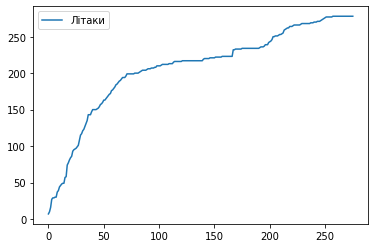

In [7]:
df.plot(y = 'Літаки')

# Extract dates

In [8]:
# Create the ResultSet
result_set = []
for month in reversed(month_list):
    res = requests.get(base_url + month)
    soup = bs4.BeautifulSoup(res.text, 'html.parser');
    data = soup.find_all("span",{"class":"black"})
    result_set.extend(data[1:-1])

In [9]:
result_set[0].getText()

'26.11.2022'

In [10]:
#df = pd.DataFrame()
dates_list = []
for i in reversed(range(len(result_set))):
    date = result_set[i].getText()
    dates_list.append(pd.Timestamp(day = int(date[0:2]), month = int(date[3:5]), year = int(date[6:])))

In [11]:
df['Дата'] = dates_list

In [12]:
#import numpy as np
#day_index = np.linspace(len(result_set),1,len(result_set))
#print(day_index)

In [13]:
#df['День'] = day_index

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Танки                       276 non-null    int64         
 1   ББМ                         276 non-null    int64         
 2   Літаки                      276 non-null    int64         
 3   Гелікоптери                 276 non-null    int64         
 4   Особовий склад              276 non-null    int64         
 5   БПЛА                        273 non-null    float64       
 6   Гармати                     273 non-null    float64       
 7   ЗРК БУК                     3 non-null      float64       
 8   Кораблі (катери)            273 non-null    float64       
 9   РСЗВ Град                   4 non-null      float64       
 10  Автомобілі                  62 non-null     float64       
 11  Засоби ППО                  271 non-null    float64       

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt

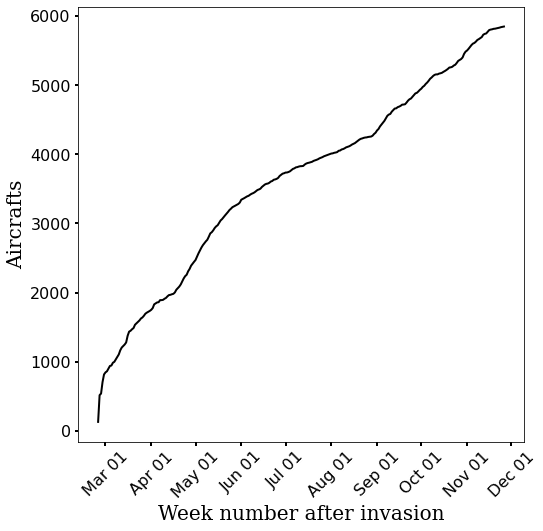

In [16]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mticker
font2 = {'family':'serif','color':'black','size':20}
formatter = mdates.DateFormatter('%b %d')

f, ax = plt.subplots(figsize=(8, 8))
f.patch.set_facecolor('white')
sns.lineplot(x="Дата", y="ББМ", linewidth=2,
                data= df, ax=ax, color = 'black')
plt.xlabel("Week number after invasion", fontdict = font2)
plt.ylabel("Aircrafts", fontdict = font2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_facecolor('w')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45,  width=2)
ax.tick_params(axis='y', width=2)
plt.savefig('aircrafts.png')


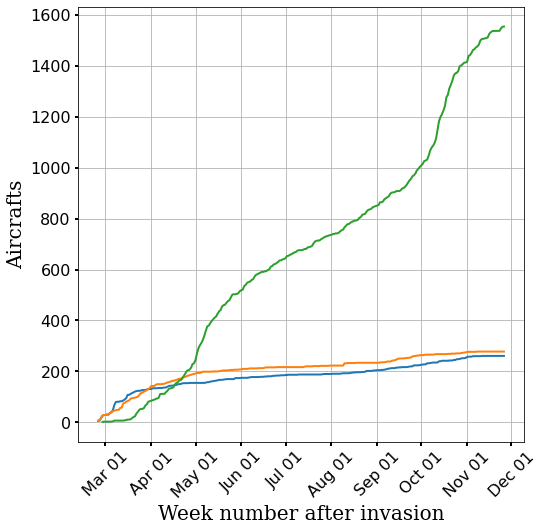

In [17]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mticker
font2 = {'family':'serif','color':'black','size':20}
formatter = mdates.DateFormatter('%b %d')

f, ax = plt.subplots(figsize=(8, 8))
f.patch.set_facecolor('white')
sns.lineplot(x="Дата", y="Гелікоптери", linewidth=2,
               data= df, ax=ax)
sns.lineplot(x="Дата", y="Літаки", linewidth=2,
                data= df, ax=ax)
#sns.lineplot(x="Дата", y="Гармати", linewidth=2,
#                data= df, ax=ax, color = 'green')
sns.lineplot(x="Дата", y="БПЛА", linewidth=2,
                data= df, ax=ax)
plt.grid()
plt.xlabel("Week number after invasion", fontdict = font2)
plt.ylabel("Aircrafts", fontdict = font2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_facecolor('w')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45,  width=2)
ax.tick_params(axis='y', width=2)
plt.savefig('aircrafts.png')
plt.show()


In [18]:
df = df.fillna(0)

In [19]:
df['Авто'] = df["Автомобілі"] + df["Автомобілі та автоцистерни"] + df["Цистерни з ППМ"]

In [20]:
df['РСЗВ'] = df['РСЗВ'] + df['РСЗВ Град']

In [21]:
df['Аеро'] = df['Літаки'] + df['БПЛА'] + df['Гелікоптери']

In [22]:
df['Подвіжна Техніка'] = df['Авто'] + df['Танки'] + df['ББМ']

In [23]:
df['Неподвіжна Техніка'] = df['РСЗВ'] + df['Гармати'] + df['Засоби ППО'] + df['Спеціальна техніка']

In [24]:
import numpy as np
df = df.replace(0,np.nan)

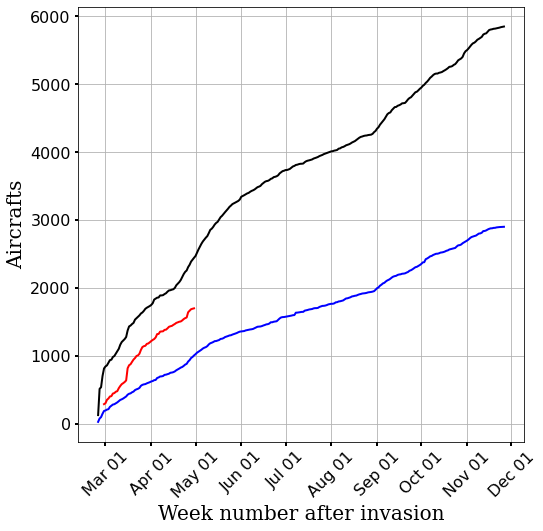

In [25]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mticker
font2 = {'family':'serif','color':'black','size':20}
formatter = mdates.DateFormatter('%b %d')

f, ax = plt.subplots(figsize=(8, 8))
f.patch.set_facecolor('white')
sns.lineplot(x="Дата", y="ББМ", linewidth=2,
               data= df, ax=ax, color = 'black')
sns.lineplot(x="Дата", y="Танки", linewidth=2,
                data= df, ax=ax, color = 'blue')
#sns.lineplot(x="Дата", y="Гармати", linewidth=2,
#                data= df, ax=ax, color = 'green')
sns.lineplot(x="Дата", y="Автомобілі", linewidth=2,
                data= df, ax=ax, color = 'red')
plt.grid()
plt.xlabel("Week number after invasion", fontdict = font2)
plt.ylabel("Aircrafts", fontdict = font2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_facecolor('w')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45,  width=2)
ax.tick_params(axis='y', width=2)
plt.savefig('aircrafts.png')
plt.show()

In [26]:
from datetime import date
d1 = date(2022, 2, 23)
d2 = datetime.date.today()

In [27]:
result = (d2-d1).days//7

In [28]:
len(df)

276

In [29]:
#df=df.drop(df.index[-1])
#df=df.drop(df.index[-1])

In [30]:
mylist = []

for i in range(0,len(df)-7,7):
    print(i)
    mylist.append(df['Особовий склад'][i+7] - df['Особовий склад'][i])
#i = (len(df) - 7*x - 1)
#list.append((df['Танки'][0] - df['Танки'][i])/i*7)

0
7
14
21
28
35
42
49
56
63
70
77
84
91
98
105
112
119
126
133
140
147
154
161
168
175
182
189
196
203
210
217
224
231
238
245
252
259
266


In [31]:
x = (len(df)-1)%7
print(df.index[-1])
if x != 0:
    mylist.append(df['Особовий склад'][df.index[-1]]-df['Особовий склад'][df.index[-1-x]])

275


In [32]:
array = np.array(mylist)
rank = array.argsort().argsort()

In [33]:
len(mylist)

40

In [34]:
np.linspace(1,23,23)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

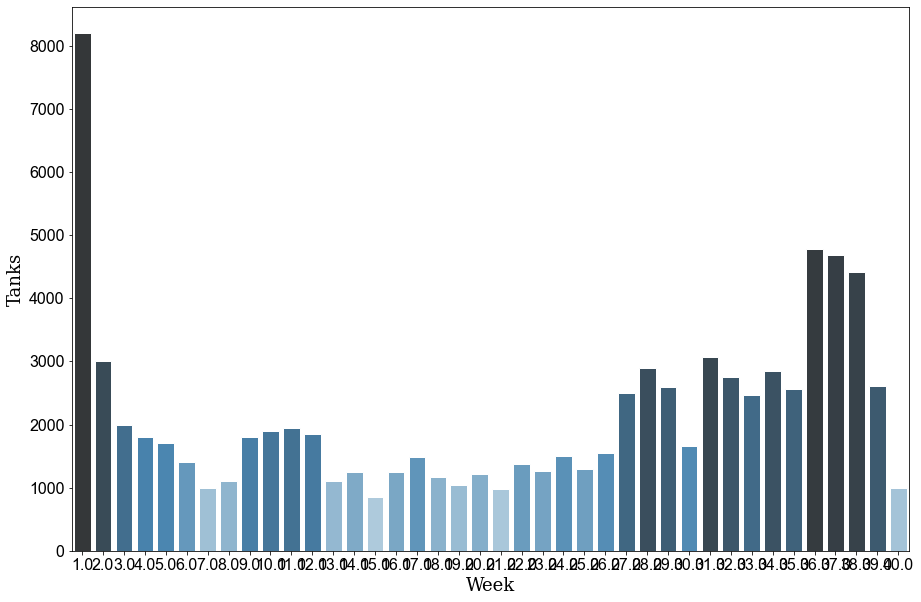

In [35]:
font2 = {'family':'serif','color':'black','size':18}
f, ax = plt.subplots(figsize=(15, 10))
sns.set_theme(style="whitegrid")
pal = sns.color_palette("Blues_d", len(mylist))
ax = sns.barplot(x = np.linspace(1,len(mylist),len(mylist)), y = mylist, palette=np.array(pal)[rank])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Week", fontdict = font2)
plt.ylabel("Tanks", fontdict = font2)
plt.savefig('tanks.png')


In [36]:
rank

array([39, 34, 25, 20, 19, 14,  3,  6, 21, 23, 24, 22,  5,  9,  0, 10, 15,
        7,  4,  8,  1, 13, 11, 16, 12, 17, 27, 33, 29, 18, 35, 31, 26, 32,
       28, 38, 37, 36, 30,  2])

In [37]:
array

array([8200, 3000, 2000, 1800, 1700, 1400, 1000, 1100, 1800, 1900, 1950,
       1850, 1100, 1250,  850, 1250, 1480, 1170, 1050, 1220,  980, 1380,
       1270, 1500, 1300, 1550, 2500, 2900, 2600, 1660, 3070, 2750, 2470,
       2850, 2570, 4780, 4690, 4420, 2610,  990])

In [38]:
array.argsort()

array([14, 20, 39,  6, 18, 12,  7, 17, 19, 13, 15, 22, 24, 21,  5, 16, 23,
       25, 29,  4,  3,  8, 11,  9, 10,  2, 32, 26, 34, 28, 38, 31, 33, 27,
        1, 30, 37, 36, 35,  0])

In [39]:
array.argsort().argsort()

array([39, 34, 25, 20, 19, 14,  3,  6, 21, 23, 24, 22,  5,  9,  0, 10, 15,
        7,  4,  8,  1, 13, 11, 16, 12, 17, 27, 33, 29, 18, 35, 31, 26, 32,
       28, 38, 37, 36, 30,  2])

In [40]:
array[::-1]

array([ 990, 2610, 4420, 4690, 4780, 2570, 2850, 2470, 2750, 3070, 1660,
       2600, 2900, 2500, 1550, 1300, 1500, 1270, 1380,  980, 1220, 1050,
       1170, 1480, 1250,  850, 1250, 1100, 1850, 1950, 1900, 1800, 1100,
       1000, 1400, 1700, 1800, 2000, 3000, 8200])

In [41]:
df['Автомобілі']

0        NaN
1        NaN
2        NaN
3        NaN
4      291.0
       ...  
271      NaN
272      NaN
273      NaN
274      NaN
275      NaN
Name: Автомобілі, Length: 276, dtype: float64

In [42]:
df['Неподвіжна Техніка']

0         NaN
1         NaN
2         NaN
3        54.0
4        95.0
        ...  
271    2647.0
272    2652.0
273    2654.0
274    2662.0
275    2663.0
Name: Неподвіжна Техніка, Length: 276, dtype: float64

In [43]:
df.to_pickle("file.pkl")

In [44]:
import datetime
from os import path
import requests
import bs4
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
formatter = mdates.DateFormatter('%b %d')

class ArmyLoss():
    
    def __init__(self):
        self.df = pd.DataFrame()
        self.base_url = 'https://index.minfin.com.ua/ua/russian-invading/casualties/'
        self.current_month = datetime.datetime.now().month 
        
        if not path.exists("armyloss.pkl"):
            
            self.month_list = []
        
            self._update_month()
               
            self._fill_df()
        
            self._add_dates()
        
            self._pre_process()
            
            self.df.to_pickle("armyloss.pkl")
            
        else:
            
            self.df = pd.read_pickle("armyloss.pkl")
            
        
#        self._generate_resultset_day()
        
    def _update_month(self):
        for i in range(2,self.current_month + 1): # add the current month
            t = datetime.datetime(2022, i, 1, 0, 0)
            t = t.strftime('%Y-%m')
            self.month_list.append(t)
            
    def _generate_resulset_data(self):
        for month in reversed(self.month_list):
            print(month)
            res = requests.get(self.base_url + month)
            soup = bs4.BeautifulSoup(res.text, 'html.parser');
            data = soup.find_all("div",{"class":"casualties"})
            self.result_set.extend(data[1:])
    
    def _fill_df(self):
        self.result_set = []
        self._generate_resulset_data()
        
        for i in reversed(range(len(self.result_set))):
            children = self.result_set[i].find_all("li")
            d = {}
            for child in children:
                list = child.getText().split()
                indx = list.index('—')
                name = []
                for j in range(indx):
                    name.append(list[j])
                name = " ".join(list[:indx])
                res = [int(ele) for ele in list if ele.isdigit()]
                d[name] = res[0]
            self.df = self.df.append(d, ignore_index = True)
    
    
    def _generate_resultset_day(self):
        self.result_set = []
        for month in reversed(self.month_list):
            res = requests.get(self.base_url + month)
            soup = bs4.BeautifulSoup(res.text, 'html.parser')
            data = soup.find_all("span",{"class":"black"})
            self.result_set.extend(data[1:-1])
        
    def _add_dates(self):
        self.result_set = []
        self._generate_resultset_day()
        
        dates_list = []
        for i in reversed(range(len(self.result_set))):
            date = self.result_set[i].getText()
            dates_list.append(pd.Timestamp(day = int(date[0:2]), month = int(date[3:5]), year = int(date[6:]))) 
        
        self.df['Дата'] = dates_list
        
                    
    def _pre_process(self):
        self.df = self.df.fillna(0)
        self.df['Автомобілі'] = self.df["Автомобілі"] + self.df["Автомобілі та автоцистерни"] + self.df["Цистерни з ППМ"]
        self.df['РСЗВ'] = self.df['РСЗВ'] + self.df['РСЗВ Град']
        self.df = self.df.replace(0,np.nan)
        self.df = self.df.drop(columns = ['ЗРК БУК','РСЗВ Град','Автомобілі та автоцистерни','Цистерни з ППМ', 'Пускові установки ОТРК'])
        
        self.df = self.df.rename(columns = {
            'Літаки':'Fighter Aircrafts',
            'Танки':'Tanks',
            'Гелікоптери':'Helicopters',
            'БПЛА':'Unamanned Aircrafts',    
            'РСЗВ':'Multiple Rocket Launcher',
            'ББМ':'Armoured Vehicles',
            'Засоби ППО':'Air Defence Systems',
            'Гармати':'Artillery',
            'Особовий склад':'Manpower',
            'Кораблі (катери)':'Ships and Boats',
            'Крилаті ракети':'Cruise Missiles',
            'Автомобілі': 'Cars and Tank Cars',
            'Спеціальна техніка':'Special Equipment',
            'Дата': 'Date'
        })
        
    def get_columns(self):
        return self.df.columns.values.tolist()
    
    def get_linechart(self, labels):
        font2 = {'family':'serif','color':'black','size':18}
        
        f, ax = plt.subplots(figsize=(8, 8))
        f.patch.set_facecolor('white')
        for item in labels:
            ax.plot(self.df['Date'], self.df[item],label = item)
        plt.grid()
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(axis='x', rotation=45,  width=2)
        ax.legend()
        plt.xlabel("Day",fontdict = font2)
        plt.ylabel("Number", fontdict = font2)
        
        return f

In [45]:
s = ArmyLoss()

In [46]:
s.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Tanks                     276 non-null    int64         
 1   Armoured Vehicles         276 non-null    int64         
 2   Fighter Aircrafts         276 non-null    int64         
 3   Helicopters               276 non-null    int64         
 4   Manpower                  276 non-null    int64         
 5   Unmanned Aircrafts        273 non-null    float64       
 6   Artillery                 273 non-null    float64       
 7   Ships and Boats           273 non-null    float64       
 8   Cars and Tank Cars        272 non-null    float64       
 9   Air Defence Systems       271 non-null    float64       
 10  Multiple Rocket Launcher  273 non-null    float64       
 11  Special Equipment         256 non-null    float64       
 12  Cruise Missiles       

In [47]:
import pandas as pd
df = pd.read_pickle("armyloss.pkl")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Tanks                     276 non-null    int64         
 1   Armoured Vehicles         276 non-null    int64         
 2   Fighter Aircrafts         276 non-null    int64         
 3   Helicopters               276 non-null    int64         
 4   Manpower                  276 non-null    int64         
 5   Unmanned Aircrafts        273 non-null    float64       
 6   Artillery                 273 non-null    float64       
 7   Ships and Boats           273 non-null    float64       
 8   Cars and Tank Cars        272 non-null    float64       
 9   Air Defence Systems       271 non-null    float64       
 10  Multiple Rocket Launcher  273 non-null    float64       
 11  Special Equipment         256 non-null    float64       
 12  Cruise Missiles       

In [49]:
label = 'Air Defence Systems'

In [50]:
int(df.iloc[-1][label] - df.iloc[-2][label])

0

In [51]:
new_pd = df.loc[(df['Date'].dt.month==5), 'Tanks']

In [52]:
new_df = pd.DataFrame()
#df = df.replace(np.nan,0)
for row in range(1, len(df.index)):
    df_to_append = df.iloc[row,:] - df.iloc[row-1,:]
    df_to_append['Date'] = df['Date'][row]
    new_df = new_df.append(df_to_append, ignore_index=True)

In [53]:
new_df

,Tanks,Armoured Vehicles,Fighter Aircrafts,Helicopters,Manpower,Unmanned Aircrafts,Artillery,Ships and Boats,Cars and Tank Cars,Air Defence Systems,Multiple Rocket Launcher,Special Equipment,Cruise Missiles,Date
0,50,386,3,1,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-25
1,20,24,6,11,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-26
2,50,166,11,8,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-27
3,41,110,2,3,800,1.0,24.0,0.0,NaN,NaN,17.0,NaN,NaN,2022-02-28
4,7,30,0,0,410,0.0,3.0,0.0,14.0,NaN,3.0,NaN,NaN,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,3,5,0,0,400,0.0,12.0,0.0,15.0,0.0,2.0,0.0,0.0,2022-11-22
271,2,5,0,0,410,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,2022-11-23
272,1,7,0,0,310,10.0,2.0,0.0,4.0,0.0,0.0,0.0,51.0,2022-11-24
273,1,5,0,0,430,6.0,6.0,0.0,4.0,0.0,0.0,2.0,0.0,2022-11-25


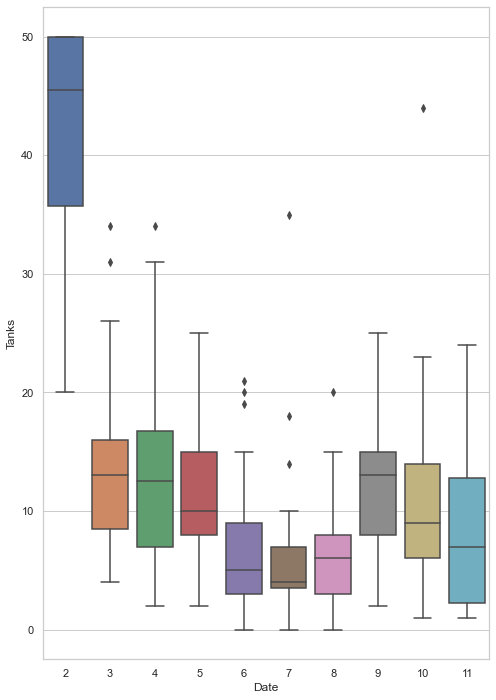

In [54]:
fig, ax = plt.subplots(figsize=(8, 12))
fig.patch.set_facecolor('white')
#df.boxplot(column = 'Tanks', by=df.Date.dt.month, ax = ax)
ax = sns.boxplot(x=new_df.Date.dt.month, y="Tanks", data=new_df)
ax.yaxis.grid(True)
plt.savefig('tanks.png')


In [55]:
df.iloc[2:,:] - df.iloc[3:,:]

,Tanks,Armoured Vehicles,Fighter Aircrafts,Helicopters,Manpower,Unmanned Aircrafts,Artillery,Ships and Boats,Cars and Tank Cars,Air Defence Systems,Multiple Rocket Launcher,Special Equipment,Cruise Missiles,Date
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0 days
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0 days
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0 days
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days
272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days
273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days


In [56]:
df = pd.read_pickle("armyloss.pkl")
df.iloc[-1]['Date'] == pd.to_datetime("today")

False

In [57]:
df.iloc[-1]['Date'].day_of_year == pd.to_datetime("today").day_of_year

True

In [58]:
import plotly

In [67]:
import plotly.express as px
fig = px.line(df, x="Date", y=["Tanks", 'Helicopters'], title='Life expectancy in Canada',  width=600, height=500)
fig.show()

In [ ]:
fig = px.bar(df, x="Data", y="count", color="medal", title="Long-Form Input")
fig.show()